# Crunching the Numbers on Crunch: Video Game Development and Crunch Culture

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [ ] NO - keep private

# Overview

The goal of this project is to investigate "crunch," mandatory or voluntary, unpaid overtime, in the video game industry and how it affects the financial and critical success of video games. Crunch and crunch culture is a hot topic in the gaming industry; studios come under scrutiny for mistreating workers during crunch cycles and the health complications that stem from overwork. Using a 2014 dataset of anonymous, self-reported responses from game developers regarding many aspects of the game development cycle including crunch and the success of a game, we primarily use regression analysis to see if there is a statistically significant correlation between crunch and the financial and critical success of a video game the responder worked on.

Our findings suggest that there is no statistically significant correlation between crunch and the success of a video game. In other words, crunch does not have a significant effect on a game's performance commercially or critically.

# Names

- Nara Chai
- Jessica Inthasane
- Vivian Quach
- Steven Tran
- Tzu Yeh (Ginny)

<a id='research_question'></a>
# Research Question

For games developed up to 2014, is there a correlation between crunch culture in the Western video game industry, and the game's commercial and critical performance?

<a id='background'></a>

## Background & Prior Work

Crunch is a term of the video game industry that refers to mandatory or strongly-encouraged overtime work done by developers in order to meet a hard deadline, most of which is either not compensated in overtime pay or completely unpaid altogether (https://www.cnet.com/news/no-fun-for-game-developers/). Many video game studios consider crunch an open secret of their production timeline; it is the norm for large studios all over the world to require developers, artists, and other teams within the studio to overwork themselves to have a shippable product to meet primetime purchasing seasons like the winter holidays or press conference announcements. The combination of crunch encouraged by corporate figures at studios and peer pressure to crunch is colloquially referred to as "crunch culture" by the public and media (https://www.gamedeveloper.com/business/crunch-culture-consequences).

Some studios are notorious for crunching their workers, but recent developments in the video game industry as well as more employees coming forward with accounts of unreasonable working conditions before and during crunches has brought the issue under public scrutiny and investigation. In 2020, video game studio Naughty Dog came under criticism for accounts coming forward about severe crunch on the release of *The Last of Us Part 2*. (https://www.ign.com/articles/last-of-us-2-crunch-naughty-dog, https://kotaku.com/as-naughty-dog-crunches-on-the-last-of-us-ii-developer-1842289962). 

Another studio, Bungie, known for their Halo and Destiny series, has publicly struggled with crunch for over a decade with no sign of improvements in recent years (https://www.gamesindustry.biz/articles/2017-08-04-bungies-13-year-battle-to-kill-crunch-culture). 

On the other hand, some video game studios have taken stances against crunch to positive reception from employees and players. The studio Supergiant who created the critically acclaimed game *Hades (2019*) has concrete policies implemented to prevent overworking developers while still shipping award-winning content on time (https://kotaku.com/the-secret-to-the-success-of-bastion-pyre-and-hades-1838082618). 

Some studios who try to avoid crunch often get backlash while doing so and revert to falling into crunch culture practices, as seen with CD Projekt Red delaying *Cyberpunk 2077* (2020) multiple times to avoid crunch, but ended up mandating overtime work of their develeopers anyways to panned reviews of the final game from both critics and players (https://www.polygon.com/2020/10/7/21505804/cyberpunk-2077-cd-projekt-red-crunch-youtube-jason-schreier-labor-the-witcher-3). 
    
These conflicting accounts about crunch and crunch culture is the primary motivation about our research and project proposal. There have been claims that crunch culture improves the quality of the game, which leads to high sales and positive ratings compared to games not developed in a crunch, but as far as we can find, there has been no statisical analyses on specific games. We chose to workwith a data set that has been anonymized, and includes personal accounts of crunch and the game's commercial and critical success.

References (links in order of appearance):
- https://www.cnet.com/news/no-fun-for-game-developers/
- https://www.gamedeveloper.com/business/crunch-culture-consequences
- https://www.ign.com/articles/last-of-us-2-crunch-naughty-dog
- https://kotaku.com/as-naughty-dog-crunches-on-the-last-of-us-ii-developer-1842289962
- https://www.gamesindustry.biz/articles/2017-08-04-bungies-13-year-battle-to-kill-crunch-culture

# Hypothesis


There is a negative correlation between crunch and a game's financial and critical performance. In other words, a video game performs worse when developers undergo crunch.

# Dataset(s)

As it turns out, video game studios caught under scrutiny for mistreating their staff do not like to publicly disclose what exactly makes them mistreat their staff. As a result, our dataset is from a reliable source who surveyed and collated data from developers who wish to anonymously report the states of the video game studios they work for.

- **Dataset Name:** Game Outcomes (2014) Raw Data
- **Link to the dataset:** https://app.box.com/s/exvjs1ilnxb7wrvou8mt
- **Number of observations:** 771

This is the main dataset for the project. It contains 771 responses from a survey conducted in 2014 targeted towards game developers. The questions were about employer culture, project management, the project's outcome, and the developer's thoughts about working on the game. Most of the survey responses are based on the Likert Scale or predetermined options by the study designers. This dataset also includes respondent-provided information about the commercial and critical performance of the games they worked on and refer to in their responses, allowing us to quantify both the crunch they experienced and the performance of the shipped game.

# Setup

In [1]:
#Importing numpy
import numpy as np

#Importing pandas
import pandas as pd

#Importing matplot
import matplotlib.pyplot as plt

#Importing seaborn
import seaborn as sns

#Importing patsy
import patsy

#Import statsmodels
import statsmodels.api as sm

#Imports scripy.stats
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

We will be needing to do a lot of cleanup on Game Outcomes (2014) Raw Data. Since there were lots of questions to this survey, we needed to choose which ones to keep wisely based on the criteria above. Our first step to this was importing the CSV for pandas to read, then we knew we would drop the unique respondent IDs since they were not necessary to this project.

In [2]:
#Reading the csv file
gameoutcome = pd.read_csv('Game Outcomes (2014) Raw Data.csv')

#Drop Respondent ID column
gameoutcome = gameoutcome.drop(labels = ['RespondentID'], axis = 1)

#Preview the new dataset
gameoutcome.head()

,"What was the total development time of the project? If you don’t know, leave these fields blank. Otherwise, enter whole numbers.",Unnamed: 2,"Approximately how many full-time developers were on the team? If you don’t know, leave the corresponding field blank. Enter whole numbers greater than zero.",Unnamed: 4,"On what broad platform(s) was the game released (or intended to be released, if the project was cancelled)? Select all that apply.",Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,"For the game's primary target platform, was the project ever delayed from its original release date, or was it cancelled?",Unnamed: 127,"To the best of your knowledge, what was the game's financial return on investment (ROI)? In other words, what kind of profit or loss did the company developing the game take as a result of publication? If you don't know, take your best guess.","To the best of your knowledge, was the game a critical success? If the game was not ranked on MetaCritic or GameRankings.com, please pick the first option.","Finally, did the game meet its internal goals? In other words, was the team happy with the game they created, and was it at least as good as the game you were trying to make?"
0,Years,and Months,Average Team Size:,Team Size at Project Completion:,Any desktop (PC/Mac),"Any console (any Xbox, Playstation, Wii)",Any mobile (iOS/Android),Any handheld (PSP/Nintendo DS),Web / Facebook,Other (please specify),...,Novel ideas were celebrated at this organizati...,I was hesitant to take creative risks in this ...,I felt comfortable sharing my creative attempt...,"If the team leadership didn't like an idea, it...",People tended to keep failed ideas to themselv...,Response,Other (please specify),Response,Response,Response
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,40,50,Any desktop (PC/Mac),"Any console (any Xbox, Playstation, Wii)",NaN,NaN,NaN,NaN,...,1-Disagree Completely,5-Agree Somewhat,3-Disagree Somewhat,5-Agree Somewhat,4-Neutral,2 Minor delays (<5% of the project's overall d...,NaN,3 Broke even (recouped all development costs),3 Marginal (70-79 MetaCritic or equivalent),3 Marginal - some goals were missed; team gen...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before renaming columns and removing any that were not relevant to the topic of overtime and crunch in game development, we needed to ensure the dataset was free of any rows or columns that were completely empty, as empty rows would represent that a respondent did not answer any survey questions at all, and any columns that were completely empty were survey questions that all respondents chose to skip.

In [3]:

#Dropping completely empty rows (empty responses) and completely empty columns (questions ignored by all respondents)
gameoutcome = gameoutcome.dropna(how = 'all', axis = 0)
gameoutcome = gameoutcome.dropna(how = 'all', axis = 1)

gameoutcome.head()

,"What was the total development time of the project? If you don’t know, leave these fields blank. Otherwise, enter whole numbers.",Unnamed: 2,"Approximately how many full-time developers were on the team? If you don’t know, leave the corresponding field blank. Enter whole numbers greater than zero.",Unnamed: 4,"On what broad platform(s) was the game released (or intended to be released, if the project was cancelled)? Select all that apply.",Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,"For the game's primary target platform, was the project ever delayed from its original release date, or was it cancelled?",Unnamed: 127,"To the best of your knowledge, what was the game's financial return on investment (ROI)? In other words, what kind of profit or loss did the company developing the game take as a result of publication? If you don't know, take your best guess.","To the best of your knowledge, was the game a critical success? If the game was not ranked on MetaCritic or GameRankings.com, please pick the first option.","Finally, did the game meet its internal goals? In other words, was the team happy with the game they created, and was it at least as good as the game you were trying to make?"
0,Years,and Months,Average Team Size:,Team Size at Project Completion:,Any desktop (PC/Mac),"Any console (any Xbox, Playstation, Wii)",Any mobile (iOS/Android),Any handheld (PSP/Nintendo DS),Web / Facebook,Other (please specify),...,Novel ideas were celebrated at this organizati...,I was hesitant to take creative risks in this ...,I felt comfortable sharing my creative attempt...,"If the team leadership didn't like an idea, it...",People tended to keep failed ideas to themselv...,Response,Other (please specify),Response,Response,Response
2,1,3,40,50,Any desktop (PC/Mac),"Any console (any Xbox, Playstation, Wii)",NaN,NaN,NaN,NaN,...,1-Disagree Completely,5-Agree Somewhat,3-Disagree Somewhat,5-Agree Somewhat,4-Neutral,2 Minor delays (<5% of the project's overall d...,NaN,3 Broke even (recouped all development costs),3 Marginal (70-79 MetaCritic or equivalent),3 Marginal - some goals were missed; team gen...
6,3,6,50,200,NaN,"Any console (any Xbox, Playstation, Wii)",NaN,NaN,NaN,NaN,...,1-Disagree Completely,6-Agree,7-Agree Completely,4-Neutral,5-Agree Somewhat,4 Significant delays (15-50% of the project's ...,NaN,3 Broke even (recouped all development costs),2 Poor (60-69 MetaCritic or equivalent),4 Good - Met most of the team’s goals
7,2,0,100,100,Any desktop (PC/Mac),"Any console (any Xbox, Playstation, Wii)",NaN,NaN,NaN,NaN,...,2-Disagree,5-Agree Somewhat,7-Agree Completely,7-Agree Completely,3-Disagree Somewhat,2 Minor delays (<5% of the project's overall d...,NaN,7 Huge Success (recouped at least 3x developm...,4 Good (80-84 MetaCritic or equivalent),3 Marginal - some goals were missed; team gen...
9,3,0,200,170,Any desktop (PC/Mac),"Any console (any Xbox, Playstation, Wii)",NaN,NaN,NaN,NaN,...,3-Disagree Somewhat,5-Agree Somewhat,6-Agree,6-Agree,3-Disagree Somewhat,5 Major delays (more than 50% of the project's...,NaN,"0 Don't know, game cancelled, or too soon to ...","0 Don’t know, game cancelled, or too soon to ...",6 Excellent - we created a much better than w...


Based on the number difference between the original dataset's shape return and after clearing any empty rows and columns, there were quite a few blank responses.

Now we can look at cleaning the dataframe more aggressively to only keep questions related to crunch. This dataset is sourced from *The Game Outcomes Project* which did a thorough study on video game development and the factors that either make it a good or bad experience for developers. In that study, the authors looked at how developers who took the survey responded to crunch, and have specified which questions were designed to ask about crunch. Our project's analysis will be using the same questions and responses.

*The Game Outcomes Project* states that five of their questions in the survey were explicitly about crunch. We will be keeping the responses to these five questions, and they were as follows:

- “I worked a lot of overtime or ‘crunched’ on this project.”
- “I often worked overtime because I was required or felt pressured to.”
- “Our team sometimes seemed to be stuck in a cycle of never-ending crunch / overtime work.”
- “If we worked overtime, I believe it was because studio leaders or producers failed to scope the project properly (e.g. insufficient manpower, deadlines that were too tight, over-promised features).”
- “If I worked overtime, it was only when I volunteered to do so.”

There were additional questions that we felt related to crunching due to mentions of tight deadlines, accountability on deadlines, and company culture regarding development time. We wanted to keep responses to these questions because they were not used in the original study to investigate correlations between crunch and other game development factors, but we thought that they should during our project review. These questions are:

- "What was the total development time of the project? If you don’t know, leave these fields blank. Otherwise, enter whole numbers." in years and months,
- "Deadlines in our studio were treated as matters of life and death, with significant consequences if they were not met."
- "Team members were held accountable for meeting their deadlines."

In order to also measure the success of the game, the survey requested that developers report if the game was a financial, critical, and personal success. The questions asked for these metrics were, in respective order:

- "To the best of your knowledge, what was the game's financial return on investment (ROI)? In other words, what kind of profit or loss did the company developing the game take as a result of publication? If you don't know, take your best guess."
- "To the best of your knowledge, was the game a critical success?  If the game was not ranked on MetaCritic or GameRankings.com, please pick the first option."
- "Finally, did the game meet its internal goals? In other words, was the team happy with the game they created, and was it at least as good as the game you were trying to make?"

We will be keeping the responses to these questions as well to quantify the success of the game as specified in our research question with the addition of if the developer personally judges the final game as a success or not.

The last set of question responses we will keep are questions that *The Game Outcomes Project* found to have particularly high correlation with their findings on crunch culture, which were:

- “There was a lot of turnover on this project.”
- “Team members would often work for weeks at a time without receiving feedback from project leads or managers.”
- “The team’s leads and managers did not have a respectful relationship with the team’s developers.”
- “The development plan for the game was clear and well-communicated to the team.”

Upon looking at these questions with a medium-to-strong correlation to crunch culture in the study, we noticed that they were about company dynamics, specifically employee turnover and dynamics between developers and leadership. We want to see if we can not only replicate the correlation that the study authors found, but see how these responses about company culture might correlate to the performance of the final game from the same commercial, critical, and personal lenses we are investigating crunch culture in.

With these questions *finally* specified, we can now safely remove all columns that are not responses to these survey questions. The code block below shows the process of doing so in a selective manner.

Because of the way the original CSV was formatted, we need to be able to see all the columns in this dataset to find the questions we want. The cell below will output gameoutcome.head() but with ALL columns visible.

In [4]:
pd.set_option('display.max_columns', None)
gameoutcome.head()

,"What was the total development time of the project? If you don’t know, leave these fields blank. Otherwise, enter whole numbers.",Unnamed: 2,"Approximately how many full-time developers were on the team? If you don’t know, leave the corresponding field blank. Enter whole numbers greater than zero.",Unnamed: 4,"On what broad platform(s) was the game released (or intended to be released, if the project was cancelled)? Select all that apply.",Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Which of the genre descriptions below best describes the game you were working on?,Unnamed: 12,I was on the project for approximately this percentage of the project's lifetime.,What sort of technology solution did the team use to create the game?,Unnamed: 15,Please select the answer below that best describes the overall level of experience of the game development team.,"Was the team offered any financial incentives tied to the performance of the game, the team, or your performance as individuals? Select all that apply.",Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,"What software development methodology did the development team use for the majority of development? If you're not sure, pick the approach that seems closest based on the descriptions below.",Unnamed: 24,"Please select the answer below that best characterizes the extent to which you agree or disagree with each of the statements below. If the project changed during development, try to pick the answer that best characterizes the situation during the majority of the game's development.",Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,"Please select the answer below that best characterizes the extent to which you agree or disagree with each of the statements below. If the project changed during development, try to pick the answer that best characterizes the situation during the majority of the game's development..1",Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,"For the game's primary target platform, was the project ever delayed from its original release date, or was it cancelled?",Unnamed: 127,"To the best of your knowledge, what was the game's financial return on investment (ROI)? In other words, what kind of profit or loss did the company developing the game take as a result of publication? If you don't know, take your best guess.","To the best of your knowledge, was the game a critical success? If the game was not ranked on MetaCritic or GameRankings.com, please pick the first option.","Finally, did the game meet its internal goals? In other words, was the team happy with the game they created, and was it at least as good as the game you were trying to make?"
0,Years,and Months,Average Team Size:,Team Size at Project Completion:,Any desktop (PC/Mac),"Any console (any Xbox, Playstation, Wii)",Any mobile (iOS/Android),Any handheld (PSP/Nintendo DS),Web / Facebook

This gives us a handy reference for which responses correspond to which questions. We will fix the strange formatting shortly, but first, let's remove all the columns with questions irrelevant to our research question.

In [5]:
#Making a list of columns that we DO want to keep
keep_columns = ['What was the total development time of the project?  If you don’t know, leave these fields blank.  Otherwise, enter whole numbers.', 
                'Unnamed: 2', 'Unnamed: 52', 'Unnamed: 50', 'Unnamed: 54', 'Unnamed: 53', 'Unnamed: 51', 'Unnamed: 47', 'Unnamed: 49',
                "To the best of your knowledge, what was the game's financial return on investment (ROI)?  In other words, what kind of profit or loss did the company developing the game take as a result of publication?  If you don't know, take your best guess.",'To the best of your knowledge, was the game a critical success?  If the game was not ranked on MetaCritic or GameRankings.com, please pick the first option.  ',
                'Unnamed: 35', 'Unnamed: 69', 'Unnamed: 56', 'Unnamed: 78']

#Replacing the original gameoutcome CSV with a new CSV with only the data we want to investigate
gameoutcome = gameoutcome[keep_columns]

#Resetting the indices to make future cleaning and manipulation easier
gameoutcome.reset_index(drop = True, inplace = True)

#Confirming the cleanup worked
gameoutcome.head()

,"What was the total development time of the project? If you don’t know, leave these fields blank. Otherwise, enter whole numbers.",Unnamed: 2,Unnamed: 52,Unnamed: 50,Unnamed: 54,Unnamed: 53,Unnamed: 51,Unnamed: 47,Unnamed: 49,"To the best of your knowledge, what was the game's financial return on investment (ROI)? In other words, what kind of profit or loss did the company developing the game take as a result of publication? If you don't know, take your best guess.","To the best of your knowledge, was the game a critical success? If the game was not ranked on MetaCritic or GameRankings.com, please pick the first option.",Unnamed: 35,Unnamed: 69,Unnamed: 56,Unnamed: 78
0,Years,and Months,"I worked a lot of overtime or ""crunched"" on th...",I often worked overtime because I was required...,Our team sometimes seemed to be stuck in a cyc...,"If we worked overtime, I believe it was becaus...","If I worked overtime, it was only when I volun...",Deadlines in our studio were treated as matter...,Team members were held accountable for meeting...,Response,Response,There was a lot of turnover on this project.,Team members would often work for weeks at a t...,The team's leads and managers did not have a r...,The development plan for the game was clear an...
1,1,3,4-Neutral,5-Agree Somewhat,5-Agree Somewhat,6-Agree,5-Agree Somewhat,4-Neutral,3-Disagree Somewhat,3 Broke even (recouped all development costs),3 Marginal (70-79 MetaCritic or equivalent),6-Agree,7-Agree Completely,4-Neutral,4-Neutral
2,3,6,7-Agree Completely,7-Agree Completely,7-Agree Completely,7-Agree Completely,1-Disagree Completely,7-Agree Completely,5-Agree Somewhat,3 Broke even (recouped all development costs),2 Poor (60-69 MetaCritic or equivalent),7-Agree Completely,7-Agree Completely,5-Agree Somewhat,1-Disagree Completely
3,2,0,4-Neutral,1-Disagree Completely,7-Agree Completely,6-Agree,7-Agree Completely,5-Agree Somewhat,6-Agree,7 Huge Success (recouped at least 3x developm...,4 Good (80-84 MetaCritic or equivalent),NaN,5-Agree Somewhat,7-Agree Completely,5-Agree Somewhat
4,3,0,7-Agree Completely,7-Agree Completely,6-Agree,5-Agree Somewhat,5-Agree Somewhat,2-Disagree,2-Disagree,"0 Don't know, game cancelled, or too soon to ...","0 Don’t know, game cancelled, or too soon to ...",5-Agree Somewhat,2-Disagree,6-Agree,5-Agree Somewhat


Now we can work on labeling the data in a nicer way! First, let's start giving our data nicer names. 

We will replace all the unnamed columns with a concise statement that summarizes what the survey question was so we can use it in a helpful way later on in our analysis. We will also get rid of that extra row once we are done transferring all the statements.

In [6]:
#Renaming columns that remain
gameoutcome.columns = ['Total development time, years','Total development time, months',
                       'Crunch','Felt pressured to crunch', 'Crunch never ended for team', 
                       'Crunch due to poor planning', 'Crunch was voluntary', 'High-stake deadlines',
                       'Deadline accountability','Financial Success', 'Critical Success','High turnover', 'No communication from leadership', 
                       'Disrespectful leadership','Clear development plan']

gameoutcome = gameoutcome.drop(0)

gameoutcome.head()

,"Total development time, years","Total development time, months",Crunch,Felt pressured to crunch,Crunch never ended for team,Crunch due to poor planning,Crunch was voluntary,High-stake deadlines,Deadline accountability,Financial Success,Critical Success,High turnover,No communication from leadership,Disrespectful leadership,Clear development plan
1,1,3,4-Neutral,5-Agree Somewhat,5-Agree Somewhat,6-Agree,5-Agree Somewhat,4-Neutral,3-Disagree Somewhat,3 Broke even (recouped all development costs),3 Marginal (70-79 MetaCritic or equivalent),6-Agree,7-Agree Completely,4-Neutral,4-Neutral
2,3,6,7-Agree Completely,7-Agree Completely,7-Agree Completely,7-Agree Completely,1-Disagree Completely,7-Agree Completely,5-Agree Somewhat,3 Broke even (recouped all development costs),2 Poor (60-69 MetaCritic or equivalent),7-Agree Completely,7-Agree Completely,5-Agree Somewhat,1-Disagree Completely
3,2,0,4-Neutral,1-Disagree Completely,7-Agree Completely,6-Agree,7-Agree Completely,5-Agree Somewhat,6-Agree,7 Huge Success (recouped at least 3x developm...,4 Good (80-84 MetaCritic or equivalent),NaN,5-Agree Somewhat,7-Agree Completely,5-Agree Somewhat
4,3,0,7-Agree Completely,7-Agree Completely,6-Agree,5-Agree Somewhat,5-Agree Somewhat,2-Disagree,2-Disagree,"0 Don't know, game cancelled, or too soon to ...","0 Don’t know, game cancelled, or too soon to ...",5-Agree Somewhat,2-Disagree,6-Agree,5-Agree Somewhat
5,1,6,6-Agree,7-Agree Completely,7-Agree Completely,6-Agree,4-Neutral,4-Neutral,4-Neutral,1 Highly unprofitable OR game was cancelled,2 Poor (60-69 MetaCritic or equivalent),5-Agree Somewhat,5-Agree Somewhat,4-Neutral,4-Neutral


Our next step is to convert the development time found in the first two columns to a singular column. For convenience, we will convert them all into months and consolidate them for future analysis.

In [7]:
#Combining the responses to development time into a standardized unit, months

#First, make any empty variables in either the years or months responses 0
gameoutcome['Total development time, years'] = gameoutcome['Total development time, years'].fillna(0)
gameoutcome['Total development time, months'] = gameoutcome['Total development time, months'].fillna(0)

gameoutcome['Total development time, years'] = (gameoutcome['Total development time, years'].astype(int) * 12) + gameoutcome['Total development time, months'].astype(int)


#Rename the years column into months to reflect our change
gameoutcome.rename(columns={'Total development time, years':'Total development time (months)'}, inplace = True)

gameoutcome = gameoutcome.drop(columns = 'Total development time, months')

#Gets rid of rows that have missing number
gameoutcome = gameoutcome.dropna(axis=0)

gameoutcome

,Total development time (months),Crunch,Felt pressured to crunch,Crunch never ended for team,Crunch due to poor planning,Crunch was voluntary,High-stake deadlines,Deadline accountability,Financial Success,Critical Success,High turnover,No communication from leadership,Disrespectful leadership,Clear development plan
1,15,4-Neutral,5-Agree Somewhat,5-Agree Somewhat,6-Agree,5-Agree Somewhat,4-Neutral,3-Disagree Somewhat,3 Broke even (recouped all development costs),3 Marginal (70-79 MetaCritic or equivalent),6-Agree,7-Agree Completely,4-Neutral,4-Neutral
2,42,7-Agree Completely,7-Agree Completely,7-Agree Completely,7-Agree Completely,1-Disagree Completely,7-Agree Completely,5-Agree Somewhat,3 Broke even (recouped all development costs),2 Poor (60-69 MetaCritic or equivalent),7-Agree Completely,7-Agree Completely,5-Agree Somewhat,1-Disagree Completely
4,36,7-Agree Completely,7-Agree Completely,6-Agree,5-Agree Somewhat,5-Agree Somewhat,2-Disagree,2-Disagree,"0 Don't know, game cancelled, or too soon to ...","0 Don’t know, game cancelled, or too soon to ...",5-Agree Somewhat,2-Disagree,6-Agree,5-Agree Somewhat
5,18,6-Agree,7-Agree Completely,7-Agree Completely,6-Agree,4-Neutral,4-Neutral,4-Neutral,1 Highly unprofitable OR game was cancelled,2 Poor (60-69 MetaCritic or equivalent),5-Agree Somewhat,5-Agree Somewhat,4-Neutral,4-Neutral
9,12,4-Neutral,4-Neutral,7-Agree Completely,1-Disagree Completely,1-Disagree Completely,4-Neutral,2-Disagree,2 Unprofitable (did not recoup all developmen...,3 Marginal (70-79 MetaCritic or equivalent),7-Agree Completely,5-Agree Somewhat,1-Disagree Completely,1-Disagree Completely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,27,5-Agree Somewhat,2-Disagree,2-Disagree,3-Disagree Somewhat,5-Agree Somewhat,4-Neutral,5-Agree Somewhat,4 Slightly profitable (recouped development c...,6 Excellent (90+ MetaCritic or equivalent),1-Disagree Completely,5-Agree Somewhat,1-Disagree Completely,7-Agree Completely
484,22,7-Agree Completely,7-Agree Completely,7-Agree Completely,2-Disagree,1-Disagree Completely,2-Disagree,7-Agree Completely,7 Huge Success (recouped at least 3x developm...,3 Marginal (70-79 MetaCritic or equivalent),2-Disagree,7-Agree Completely,7-Agree Completely,1-Disagree Completely
485,24,3-Disagree Somewhat,3-Disagree Somewhat,1-Disagree Completely,3-Disagree Somewhat,3-Disagree Somewhat,3-Disagree Somewhat,5-Agree Somewhat,7 Huge Success (recouped at least 3x developm...,6 Excellent (90+ MetaCritic or equivalent),2-Disagree,2-Disagree,3-Disagree Somewhat,7-Agree Completely
486,20,2-Disagree,2-Disagree,1-Disagree Completely,4-Neutral,7-Agree Completely,2-Disagree,3-Disagree Somewhat,3 Broke even (recouped all development costs),3 Marginal (70-79 MetaCritic or equivalent),2-Disagree,2-Disagree,2-Disagree,5-Agree Somewhat


Next, notice that the responses to questions where respondents needed to pick from a numeric scale depending on their agreement with a statement were encoded in the dataset as strings. To do analysis and display our results easily, we are converting the responses into integers. 

We converted each string from the Likert Scale to an integer, the lower the value the more the respondent disagreed and the higher the more they agreed.

The first three cells of code below is the initial conversion from string-type responses to integer-type responses.

In [8]:
#This method converts all the string responses from a scale of 1 to 7 into integers
def convert_to_int(str_in):
    #take the first char of the string and convert it to type int
    #if it is not a string, ignore it
    if type(str_in) != str:
        output = str_in
    else:
        str_num = str_in[0]
        output = int(str_num)
    return output

In [9]:
#This method applies the previously made string-to-integer conversion method to their relevant columns
def convert_columns_toint(game_df):
    #converts all strings into type int
    for i in game_df:
        game_df[i] = game_df[i].apply(convert_to_int)

In [10]:
#call function of gameoutcome to convert strings to int
convert_columns_toint(gameoutcome)
gameoutcome

,Total development time (months),Crunch,Felt pressured to crunch,Crunch never ended for team,Crunch due to poor planning,Crunch was voluntary,High-stake deadlines,Deadline accountability,Financial Success,Critical Success,High turnover,No communication from leadership,Disrespectful leadership,Clear development plan
1,15,4,5,5,6,5,4,3,3,3,6,7,4,4
2,42,7,7,7,7,1,7,5,3,2,7,7,5,1
4,36,7,7,6,5,5,2,2,0,0,5,2,6,5
5,18,6,7,7,6,4,4,4,1,2,5,5,4,4
9,12,4,4,7,1,1,4,2,2,3,7,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,27,5,2,2,3,5,4,5,4,6,1,5,1,7
484,22,7,7,7,2,1,2,7,7,3,2,7,7,1
485,24,3,3,1,3,3,3,5,7,6,2,2,3,7
486,20,2,2,1,4,7,2,3,3,3,2,2,2,5


Next we need to standardize the numeric scales for these questions, as they all have different minimum and maximum values. For example, the question "Was the game a critical success?" used a scale of 0 to 6 while most of the other questions have been using a scaling of 1 to 7. So we standardized all the Likert Scales to a common 7 point scale, 1 to 7, so we can accurately and safely analyze the data.

In [11]:
#This method transforms scales that have a max value of 6 to a max value of 7 by adding 1 to their value
#Also safely makes any responses that were 0 stay at the lowest possible value on our standard scale, 1
def standardize_scale_6to7(int_in):
    #transforming likert scales of 6 point to 7 point and round to 2 decimal places
    output = int_in + 1
    return output

In [12]:
#This method applies our scale standardization method above to the columns that need it
#In other words, will ONLY be executed if the maximum value of the responses is 6
def standardize_column_scale_6to7(game_df):
    #converts each column that uses a scale of 6 to one of 7
    for i in game_df:
        #ignore columns that aren't using the scale 6
        if game_df[i].max() != 6:
            continue
        game_df[i] = game_df[i].apply(standardize_scale_6to7)

In [13]:
#Let's see the results to confirm this conversion worked
standardize_column_scale_6to7(gameoutcome)
gameoutcome.head()

,Total development time (months),Crunch,Felt pressured to crunch,Crunch never ended for team,Crunch due to poor planning,Crunch was voluntary,High-stake deadlines,Deadline accountability,Financial Success,Critical Success,High turnover,No communication from leadership,Disrespectful leadership,Clear development plan
1,15,4,5,5,6,5,4,3,3,4,6,7,4,4
2,42,7,7,7,7,1,7,5,3,3,7,7,5,1
4,36,7,7,6,5,5,2,2,0,1,5,2,6,5
5,18,6,7,7,6,4,4,4,1,3,5,5,4,4
9,12,4,4,7,1,1,4,2,2,4,7,5,1,1


Since we are looking at two different measures of success for each game, financial and critical success, it would be wise to make an aggregate score that takes all of them into account for analysis as well as keeping the original scores in the columns they are currently presented in.

To make a single score that takes all the success measures into consideration, we will be calculating the average score between those three measures of success into a "Success Score" column, as seen below. Note how the Success Score column's entries are float-type data points.

In [14]:
gameoutcome['Success Score'] = gameoutcome[['Financial Success', 'Critical Success']].mean(axis=1)

gameoutcome.head()

,Total development time (months),Crunch,Felt pressured to crunch,Crunch never ended for team,Crunch due to poor planning,Crunch was voluntary,High-stake deadlines,Deadline accountability,Financial Success,Critical Success,High turnover,No communication from leadership,Disrespectful leadership,Clear development plan,Success Score
1,15,4,5,5,6,5,4,3,3,4,6,7,4,4,3.5
2,42,7,7,7,7,1,7,5,3,3,7,7,5,1,3.0
4,36,7,7,6,5,5,2,2,0,1,5,2,6,5,0.5
5,18,6,7,7,6,4,4,4,1,3,5,5,4,4,2.0
9,12,4,4,7,1,1,4,2,2,4,7,5,1,1,3.0


With this data cleaning finally complete and a new aggregate score to use alongside the original scores, we can move on to the real analysis of this data to answer our research question.

We are operazationalizing our research question in the context of our dataset by analyzing the response to questions that referred to crunching during a video game's development and other closely-related factors to crunch like sudden changes and poor communication with development teams. These sections of the dataset will be compared to the reported critical and financial outcomes of these games to see if more crunch (which we will quantify in the next section) correlates to a statistically significant reduction to a game's commercial and critical success.

Our working hypothesis is that we *will* observe a statistically significant reduction to a game's commercial and critical success if there was more reported crunch on a game's development.

# Data Analysis & Results

To start off the EDA section of this investigation, let's get a general survey of crunch out of the respondents. Using Seaborn's countplot method, we made a simple bar graph with the responses from the survey question that was the most explicit about crunch in the video game development cycle: "I worked a lot of overtime or "crunched" on this project." We picked this survey question to use for our preliminary EDA since it was the most obvious question about crunch that developers would have a solid opinion on for the project they were filling the survey out for.

[Text(0.5, 1.0, 'People who experienced crunch (Fig. 1)')]

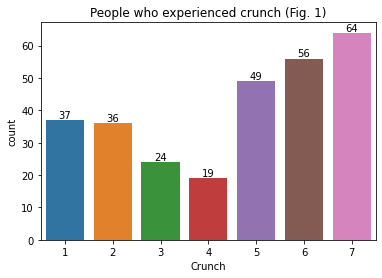

In [15]:
all_crunch = sns.countplot(x=gameoutcome['Crunch'], data = gameoutcome)
all_crunch.bar_label(all_crunch.containers[0])
all_crunch.set(title = "People who experienced crunch (Fig. 1)")

The resulting countplot is a convenient and quick way to lay out of the full distribution of answers to this question from all respondents that answered it. We can tell from the countplot that a total of 169 respondents experienced some degree of crunch (answers ranging from from 5-7) and 116 didn't experience crunch (answers ranging from 1-4). Combined, more respondents experienced some degree of crunch than respondents that did not experience crunch.

With this in mind, let's take the responses to that same question and apply it to the success of each respondent's game. Common sense might say that games that are financial successes must be critical successes as well, since financial successes typically mean more people bought the game, but that doesn't necessarily mean that those who bought the game enjoyed it. 

We compared data from experiences with crunch to financial and critical successes to see their impact on each other. 

We used Seaborn's regplot method to lay out all the responses relative to the type of successes with each combination of success paired with another. We chose regplot in order to see what the general trend between these types of success are before going into how crunch can affect them as well.

[Text(0.5, 1.0, 'Financial Success given Crunch (Fig. 2)')]

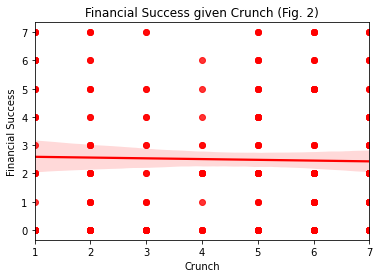

In [16]:
#This visualization plots financial success as an outcome of a given amount of crunch experienced
fin_crit_success = sns.regplot(x = gameoutcome['Crunch'], y = gameoutcome['Financial Success'], color='red')
fin_crit_success.set(title = "Financial Success given Crunch (Fig. 2)")

[Text(0.5, 1.0, 'Critical Success given Crunch (Fig. 3)')]

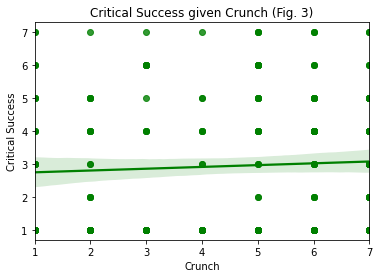

In [17]:
#This visualization plots critical success as an outcome of a given amount of crunch experienced
fin_crunch = sns.regplot(x = gameoutcome['Crunch'], y = gameoutcome['Critical Success'], color='green')
fin_crunch.set(title = "Critical Success given Crunch (Fig. 3)")

[Text(0.5, 1.0, 'Critical Success given Financial Success (Fig. 4)')]

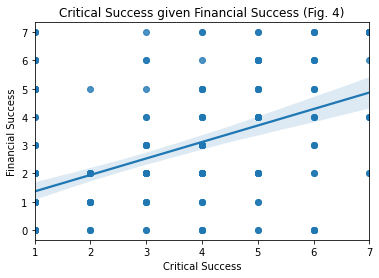

In [18]:
#This visualization plots critical success to financial success 
crit_crunch = sns.regplot(x = gameoutcome['Critical Success'], y = gameoutcome['Financial Success'])
crit_crunch.set(title = "Critical Success given Financial Success (Fig. 4)")

[Text(0.5, 1.0, 'Financial Success given Critical Success (Fig. 5)')]

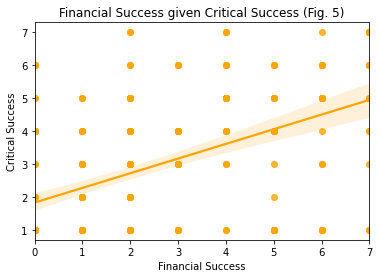

In [19]:
#This visualization plots financial success to critical success 
crit_crunch = sns.regplot(x = gameoutcome['Financial Success'], y = gameoutcome['Critical Success'], color = 'orange')
crit_crunch.set(title = "Financial Success given Critical Success (Fig. 5)")

From our visuals, we can confirm that the higher the financial success, the higher the critical success and vise versa (this makes common sense). Interestingly, the scatterplots that plot financial and critical success with crunch as their predictors are near-horizontal lines. With our working hypothesis, we assumed that we would see a larger slope, or in other words, that crunch would be a strong predictor of financial and critical success. Visualizing our data is seeming to imply that this may not be the case!

To get a deeper look into what these scatterplots mean, we will to determine whether there's a statistically significant relationship between crunch and the two success values. We'll start with calculating OLS regression statistics to see if there is a statistically significant correlation between this single crunch question's responses and the financial or critical success of a game.

The code below is for two OLS regression tests: the first calculates regression statistics for financial success of a each respondent's game with the responses regarding crunch from the same question used above, and the second calculates regression statistics for critical success alongside crunch.

In [20]:
#OLS Regression table with financial success as the independent variable and crunch as the dependent variable
outcome, predictors = patsy.dmatrices('Q("Financial Success") ~ Crunch', gameoutcome)
mod = sm.OLS(outcome, predictors)

res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Financial Success")   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.003
Method:                     Least Squares   F-statistic:                    0.1740
Date:                    Sat, 12 Mar 2022   Prob (F-statistic):              0.677
Time:                            12:16:39   Log-Likelihood:                -640.51
No. Observations:                     285   AIC:                             1285.
Df Residuals:                         283   BIC:                             1292.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [21]:
#OLS Regression table with financial success as the independent variable and crunch as the dependent variable
outcome, predictors = patsy.dmatrices('Q("Critical Success") ~ Crunch', gameoutcome)
mod = sm.OLS(outcome, predictors)

res = mod.fit()
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Critical Success")   R-squared:                       0.003
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.9492
Date:                   Sat, 12 Mar 2022   Prob (F-statistic):              0.331
Time:                           12:16:39   Log-Likelihood:                -601.47
No. Observations:                    285   AIC:                             1207.
Df Residuals:                        283   BIC:                             1214.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6937 

Interestingly, when calculating OLS regression statistics on how only one specific question about crunch affects the financial and critical success of a game, financial success has a negative, weak coefficient and critical success has a very weak coefficient! This is making our hypothesis look like it may be wrong, but let's not jump to conclusions just yet. Notice the p-value for "Crunch" in both OLS regression results; it's rather large! This implies that looking at crunch as a measure of financial or critical success with just one question is not necessarily a strong analysis, nor are our results statistically significant. If we were to run this survey many, many times with different respondents talking about different games, it would be likely that we would find a correlation between crunch and success similar to these. 

Luckily for us, we kept many other questions from the survey regarding crunch that we can investigate!

## Investigating Aspects of Crunch and Game Success

We want to visualize the effects of different types of crunch have on a games success in order to do more data analysis on the topic. We asked ourselves, would different aspects to crunch like harsh deadlines, poor management, and workplace culture in particular have adverse affects on financial and critical success of a game? Would these different aspects of crunch perhaps affect the financial and critical success of a game differently as opposed to simply the *presence* of crunch which we just investigated?

To answer this question, we categorized the statements survey respondents agreed or disagreed with from our data cleaning into categories based on the aspects of crunch they were responding to and calculated the mean of an individual’s answers to the statements in each category. We saved this mean to a new column labeled with the aspect of crunch that the category was named after.

The aspects of crunch we categorized are as follows:
* **Deadlines** : 
    * "Deadlines in our studio were treated as matters of life and death, with significant consequences if they were not met."
    * "Team members were held accountable for meeting their deadlines."
    * “The development plan for the game was clear and well-communicated to the team.”<sup>[1]</sup>
    
* **Management** : 
    * “If we worked overtime, I believe it was because studio leaders or producers failed to scope the project properly (e.g. insufficient manpower, deadlines that were too tight, over-promised features).”
    * “Team members would often work for weeks at a time without receiving feedback from project leads or managers.”
    * “The team’s leads and managers did not have a respectful relationship with the team’s developers.”
    
* **Workplace Culture** : 
    * “I often worked overtime because I was required or felt pressured to.”
    * “Our team sometimes seemed to be stuck in a cycle of never-ending crunch / overtime work.”
    * “There was a lot of turnover on this project.”
    * “If I worked overtime, it was only when I volunteered to do so.”

[1] note: The current question scales having less crunch as high and more crunch as low so we invert the scale so it is consistent with other questions (higher value is more crunch).

In [22]:
#This method inverts the scale of a column
def invert_scale(in_int):
        return 8-in_int
        
#rescales the question to have more crunch = higher values
gameoutcome['Clear development plan'] = gameoutcome['Clear development plan'].apply(invert_scale)
gameoutcome.rename(columns={'Clear development plan':'Unclear development plan'}, inplace = True)
gameoutcome.head()

,Total development time (months),Crunch,Felt pressured to crunch,Crunch never ended for team,Crunch due to poor planning,Crunch was voluntary,High-stake deadlines,Deadline accountability,Financial Success,Critical Success,High turnover,No communication from leadership,Disrespectful leadership,Unclear development plan,Success Score
1,15,4,5,5,6,5,4,3,3,4,6,7,4,4,3.5
2,42,7,7,7,7,1,7,5,3,3,7,7,5,7,3.0
4,36,7,7,6,5,5,2,2,0,1,5,2,6,3,0.5
5,18,6,7,7,6,4,4,4,1,3,5,5,4,4,2.0
9,12,4,4,7,1,1,4,2,2,4,7,5,1,7,3.0


In [23]:
#columns categorized by crunch type
deadlines = gameoutcome[['High-stake deadlines','Deadline accountability','Unclear development plan']]
management = gameoutcome[['Crunch due to poor planning','No communication from leadership','Disrespectful leadership']]
workplace_culture = gameoutcome[['Crunch never ended for team', 'Felt pressured to crunch','High turnover', 'Crunch was voluntary']]

#create new category columns with the average of the columns from category
gameoutcome['Deadline crunch'] = deadlines.mean(axis=1)
gameoutcome['Management crunch'] = management.mean(axis=1)
gameoutcome['Workplace culture'] = workplace_culture.mean(axis=1)

#normalize data to whole numbers
gameoutcome['Deadline crunch'] = gameoutcome['Deadline crunch'].round(decimals = 0)
gameoutcome['Management crunch'] = gameoutcome['Management crunch'].round(decimals = 0)
gameoutcome['Workplace culture'] = gameoutcome['Workplace culture'].round(decimals = 0)

gameoutcome.head()


,Total development time (months),Crunch,Felt pressured to crunch,Crunch never ended for team,Crunch due to poor planning,Crunch was voluntary,High-stake deadlines,Deadline accountability,Financial Success,Critical Success,High turnover,No communication from leadership,Disrespectful leadership,Unclear development plan,Success Score,Deadline crunch,Management crunch,Workplace culture
1,15,4,5,5,6,5,4,3,3,4,6,7,4,4,3.5,4.0,6.0,5.0
2,42,7,7,7,7,1,7,5,3,3,7,7,5,7,3.0,6.0,6.0,6.0
4,36,7,7,6,5,5,2,2,0,1,5,2,6,3,0.5,2.0,4.0,6.0
5,18,6,7,7,6,4,4,4,1,3,5,5,4,4,2.0,4.0,5.0,6.0
9,12,4,4,7,1,1,4,2,2,4,7,5,1,7,3.0,4.0,2.0,5.0


To make our data frame easier to read *only* the categories of crunch, let's make a new dataset with only those columns and the scores for financial and critical success.

In [24]:
crunchtable = gameoutcome[['Financial Success', 'Critical Success', 'Success Score', 'Deadline crunch', 'Management crunch', 'Workplace culture']]

crunchtable.head()

,Financial Success,Critical Success,Success Score,Deadline crunch,Management crunch,Workplace culture
1,3,4,3.5,4.0,6.0,5.0
2,3,3,3.0,6.0,6.0,6.0
4,0,1,0.5,2.0,4.0,6.0
5,1,3,2.0,4.0,5.0,6.0
9,2,4,3.0,4.0,2.0,5.0


Alright! From here, let's look at some more scatterplots and OLS regression statistics to see how each aspect of crunch may affect financial and critical success at a glance.

For easier reading, we will display a scatterplot that uses an aspect of crunch as the predictor to financial or critical success, run an OLS regression for both types of success immediately after each scatterplot is displayed, then interpret the results of the regression statistics of both financial and critical success based on the aspect of crunch.

### Deadline Crunch vs. Success

[Text(0.5, 1.0, 'Deadline crunch given Financial Success (Fig. 6)')]

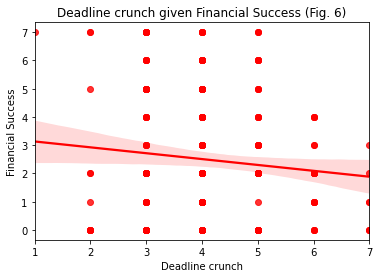

In [25]:
#This visualization plots financial success as an outcome of deadline crunch
deadlines_financial = sns.regplot(x = crunchtable['Deadline crunch'], y = crunchtable['Financial Success'], color='red')
deadlines_financial.set(title = "Deadline crunch given Financial Success (Fig. 6)")

In [26]:
#OLS Regression table with financial success as the independent variable and deadline crunch as the dependent variable
outcome, predictors = patsy.dmatrices('Q("Financial Success") ~ Q("Deadline crunch")', gameoutcome)
mod = sm.OLS(outcome, predictors)

res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Financial Success")   R-squared:                       0.010
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     2.959
Date:                    Sat, 12 Mar 2022   Prob (F-statistic):             0.0865
Time:                            12:16:39   Log-Likelihood:                -639.12
No. Observations:                     285   AIC:                             1282.
Df Residuals:                         283   BIC:                             1290.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

[Text(0.5, 1.0, 'Deadline crunch given Critical Success (Fig. 7)')]

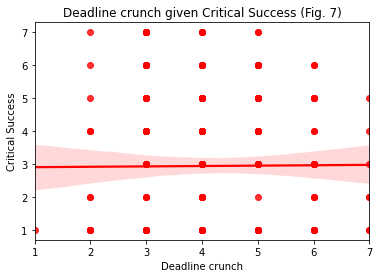

In [27]:
#This visualization plots critical success as an outcome of a deadline crunch
deadlines_critical = sns.regplot(x = crunchtable['Deadline crunch'], y = crunchtable['Critical Success'], color='red')
deadlines_critical.set(title = "Deadline crunch given Critical Success (Fig. 7)")

In [28]:
#OLS Regression table with critical success as the independent variable and crunch as the dependent variable
outcome, predictors = patsy.dmatrices('Q("Critical Success") ~ Q("Deadline crunch")', gameoutcome)
mod = sm.OLS(outcome, predictors)

res = mod.fit()
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Critical Success")   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.003
Method:                    Least Squares   F-statistic:                   0.01186
Date:                   Sat, 12 Mar 2022   Prob (F-statistic):              0.913
Time:                           12:16:40   Log-Likelihood:                -601.94
No. Observations:                    285   AIC:                             1208.
Df Residuals:                        283   BIC:                             1215.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
In

When looking at how crunch regarding deadlines affects success with just the scatterplots, there seems to be a stronger negative correlation between deadline crunch and financial success while deadline crunch and critical success is a near-horizontal line.

When we run OLS regression on both scatterplots, we are confirmed in seeing that there is a negative correlation between financial success and deadline crunch, and a very weak positive correlation between critical success and deadline crunch. The p-value of finding a negative correlation of that strength between financial success and deadline crunch is 0.086 and the  p-value of finding a positive correlation of that strength between critical success and deadline crunch is 0.913. At the standard alpha level of 0.05, these results are not statistically significant results to reject a null hypothesis from.

### Management Crunch vs. Success

[Text(0.5, 1.0, 'Management crunch given Financial Success (Fig. 8)')]

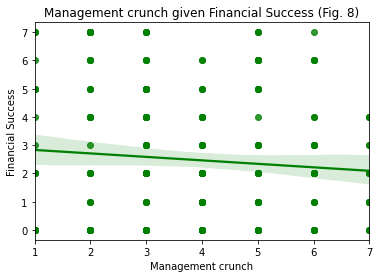

In [29]:
#This visualization plots financial success as an outcome of management crunch
fin_crit_success = sns.regplot(x = crunchtable['Management crunch'], y = crunchtable['Financial Success'], color='green')
fin_crit_success.set(title = "Management crunch given Financial Success (Fig. 8)")

In [30]:
#OLS Regression table with financial success as the independent variable and management crunch as the dependent variable
outcome, predictors = patsy.dmatrices('Q("Financial Success") ~ Q("Management crunch")', gameoutcome)
mod = sm.OLS(outcome, predictors)

res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Financial Success")   R-squared:                       0.008
Model:                                OLS   Adj. R-squared:                  0.004
Method:                     Least Squares   F-statistic:                     2.205
Date:                    Sat, 12 Mar 2022   Prob (F-statistic):              0.139
Time:                            12:16:40   Log-Likelihood:                -639.49
No. Observations:                     285   AIC:                             1283.
Df Residuals:                         283   BIC:                             1290.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

[Text(0.5, 1.0, 'Management crunch given Critical Success (Fig. 9)')]

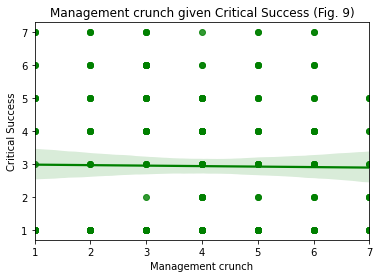

In [31]:
#This visualization plots critical success as an outcome of management crunch
fin_crit_success = sns.regplot(x = crunchtable['Management crunch'], y = crunchtable['Critical Success'], color='green')
fin_crit_success.set(title = "Management crunch given Critical Success (Fig. 9)")

In [32]:
#OLS Regression table with critical success as the independent variable and management crunch as the dependent variable
outcome, predictors = patsy.dmatrices('Q("Critical Success") ~ Q("Management crunch")', gameoutcome)
mod = sm.OLS(outcome, predictors)

res = mod.fit()
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Critical Success")   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.003
Method:                    Least Squares   F-statistic:                   0.04199
Date:                   Sat, 12 Mar 2022   Prob (F-statistic):              0.838
Time:                           12:16:40   Log-Likelihood:                -601.92
No. Observations:                    285   AIC:                             1208.
Df Residuals:                        283   BIC:                             1215.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Crunch from management and hown it affects success looks rather similar to how deadline crunch affects success; there seems to be a stronger negative correlation between management crunch and financial success than management crunch and critical success.

The OLS regression results for both scatterplots have a negative correlation between management crunch and both financial and critical success. Financial success predicted from management crunch does have a stronger coefficient at -0.1232 whereas critical success has a coefficient of -0.0149. The p-value of finding a negative correlation of -0.1232 or stronger between financial success and management crunch is 0.139 and the  p-value of finding a negative correlation of -0.0149 or stronger between critical success and management crunch is 0.838. At the standard alpha level of 0.05, these results are not statistically significant results to reject a null hypothesis.

### Workplace Culture vs. Success

[Text(0.5, 1.0, 'Workplace Culture given Financial Success (Fig. 10)')]

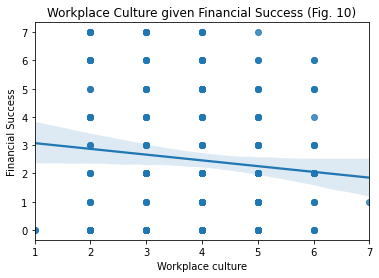

In [33]:
#This visualization plots financial success as an outcome of workplace culture
fin_crit_success = sns.regplot(x = crunchtable['Workplace culture'], y = crunchtable['Financial Success'])
fin_crit_success.set(title = "Workplace Culture given Financial Success (Fig. 10)")

In [34]:
#OLS Regression table with financial success as the independent variable and workplace culture as the dependent variable
outcome, predictors = patsy.dmatrices('Q("Financial Success") ~ Q("Workplace culture")', gameoutcome)
mod = sm.OLS(outcome, predictors)

res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Financial Success")   R-squared:                       0.012
Model:                                OLS   Adj. R-squared:                  0.008
Method:                     Least Squares   F-statistic:                     3.306
Date:                    Sat, 12 Mar 2022   Prob (F-statistic):             0.0701
Time:                            12:16:41   Log-Likelihood:                -638.94
No. Observations:                     285   AIC:                             1282.
Df Residuals:                         283   BIC:                             1289.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

[Text(0.5, 1.0, 'Workplace Culture given Critical Success (Fig. 11)')]

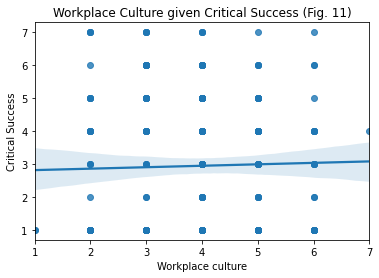

In [35]:
#This visualization plots critical success as an outcome of workplace culture
fin_crit_success = sns.regplot(x = crunchtable['Workplace culture'], y = crunchtable['Critical Success'])
fin_crit_success.set(title = "Workplace Culture given Critical Success (Fig. 11)")

In [36]:
#OLS Regression table with critical success as the independent variable and workplace culture as the dependent variable
outcome, predictors = patsy.dmatrices('Q("Critical Success") ~ Q("Workplace culture")', gameoutcome)
mod = sm.OLS(outcome, predictors)

res = mod.fit()
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Critical Success")   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.003
Method:                    Least Squares   F-statistic:                    0.2004
Date:                   Sat, 12 Mar 2022   Prob (F-statistic):              0.655
Time:                           12:16:41   Log-Likelihood:                -601.84
No. Observations:                    285   AIC:                             1208.
Df Residuals:                        283   BIC:                             1215.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Like the two aspects of crunch before it, workplace culture has a stronger negative correlation to financial success than it does to critical success.

Interestingly, the OLS regression results of financial success as predicted from workplace culture has the strongest negative correlation between the two variables out of all other aspects of crunch at -0.2037 and a p-value of 0.07. This p-value is also the lowest out of all variable combinations analyzed. Critical success predicted from workplace culture has a very slightly positive correlation coefficient of 0.044 and a p-value of 0.655. Neither of these p-values are low enough to reject our null hypothesis though.

# Ethics & Privacy

Our dataset collected responses to a survey from individual game developers, but names or other personally-identifying information was either not collected or redacted before public release. This prevents possible blacklisting or retaliation from game companies if they were to reveal mistreatment or poor conditions during a game's development if a certain studio or game was mentioned. All information we found is publicly accessible through the sources listed above.

There are possible complications for companies, where they could out employees/participants in the data collected, and punish them for opposing company motives (i.e an employee reporting about crunch culture workstyle in a company that supports crunch culture). The bias would oppose companies that support crunch culture, and gamers that find issue with companies that don't work to their expectations. This data excludes marketing efforts of games, which may influence the profits/sales of games as opposed to the game developers' work quality, as well as the difference in game development environments -- indie to mainstream companies.


# Conclusion & Discussion

Going into this project, our group was originally interested in analyzing the crunch of animators and mangakas (a person who creates manga). However, we discovered there was no data regarding that topic so we had to turn our focus to crunch in the video game industry. In this project, we explored the potential relationship between crunch as a whole and different types of crunch: deadlines, management, and workplace culture, on the financial and critical success of a game. We used a dataset from a 2014 survey of game developers that included questions relating to crunch at their workplace and the success of their game. Our initial background research suggested that crunch negatively impacts a video game's critical and financial success because of employee stress from overwork. However, from our data and analysis, we could not identify a statistically significant relationship between the amount of crunch experienced by a game's development team and the game's success.

We conducted linear regression and OLS models between categories crunch and the financial and critical success of the employee's game. Overall there were slight negative correlations between most types of crunch and financial success and positive but near-zero correlations between crunches and critical success. However, the p-values of our OLS models were larger than our significance value 0.05, so we cannot conclude there is a statically significant correlation between our variables of crunch and success. So we must reject our hypothesis that crunch has a negative correlation with a video game's critical and financial success.

Limitations

There were limitations in the size and scope of our dataset; it is only 2014 data, so it does not fully reflect the gaming industry today. The survey data also does not fully represent the variables we were measuring. Crunch, critical success, and financial success were all measured by the employees' opinion, which is subjective and may contain bias. The anonymous nature of the survey also made it difficult to connect it to other datasets. Because we could not link a game or company to the employee response it was impossible to connect another dataset, like company revenue. But anonymous responses were necessary for more honest answers.

Impact

Crunch is a serious issue, especially within the video game industry. Although our research did not find a correlation between crunch and game success, it does not justify the practice. A workplace environment filled with stress from overworking and deadlines are not healthy for employees. So with no clear incentive in terms of the final game's success financially or critically, companies should not allow crunch culture in their workplace.

# Team Contributions

Nara Chai: Proposal, Ethics & Privacy, Data Cleaning, EDA, Discussion, Video (scripting and slides)
Steven Tran: Data Cleaning, EDA, Conclusion
Ginny (Tzu Yeh): 
Jessica Inthasane: 
Vivian Quach: Proposal, Ethics & Privacy, EDA, Video